In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import numpy as np

from sky_spot import env

sns.set_style('whitegrid')

OVERHEAD = 0.1
EXP_PATH = f'../../exp-new-sliced/real_overhead={OVERHEAD}'

trace_type = f'trace-us-west-2a_v100_1-ddl=52.0-dur=48.0-over={OVERHEAD}'

In [3]:
traces = {}


exp_file = os.path.join(EXP_PATH, f'on_demand-{trace_type}').replace('ddl=52', 'ddl=1000')
with open(exp_file) as f:
    exp = json.load(f)
only_spot_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['On Demand'] = only_spot_trace_df


exp_file = os.path.join(EXP_PATH, f'only_spot-{trace_type}').replace('ddl=52', 'ddl=1000')
with open(exp_file) as f:
    exp = json.load(f)
only_spot_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['Only Spot'] = only_spot_trace_df

exp_file = os.path.join(EXP_PATH, f'strawman-{trace_type}')
with open(exp_file) as f:
    exp = json.load(f)
greedy_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['Greedy'] = greedy_trace_df

exp_file = os.path.join(EXP_PATH, f'time_sliced_4.0h-{trace_type}')
with open(exp_file) as f:
    exp = json.load(f)
time_sliced_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['Time Sliced'] = time_sliced_trace_df

exp_file = os.path.join(EXP_PATH, f'ideal_ilp_overhead-{trace_type}')
with open(exp_file) as f:
    exp = json.load(f)
ideal_ilp_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['Optimal'] = ideal_ilp_trace_df

exp_file = os.path.join(EXP_PATH, f'loose_time_sliced_4.0h-{trace_type}')
with open(exp_file) as f:
    exp = json.load(f)
loose_time_sliced_trace_df = pd.DataFrame.from_records(exp['history'][0])
traces['Loose Time Sliced'] = loose_time_sliced_trace_df


In [4]:
exp_file = os.path.join(EXP_PATH, f'ideal_no_overhead-{trace_type}').replace(str(OVERHEAD), '0.0')
with open(exp_file) as f:
    exp = json.load(f)
traces['Optimal (no overhead)'] = pd.DataFrame.from_records(exp['history'][0])

In [5]:
colors = sns.color_palette('colorblind')
colors = {
    'Only Spot': colors[0],
    'On Demand': colors[1],
    'Greedy': colors[2],
    'Time Sliced': colors[3],
    'Loose Time Sliced': colors[3],
    'Optimal': colors[4],
    'Optimal (no overhead)': colors[4],
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

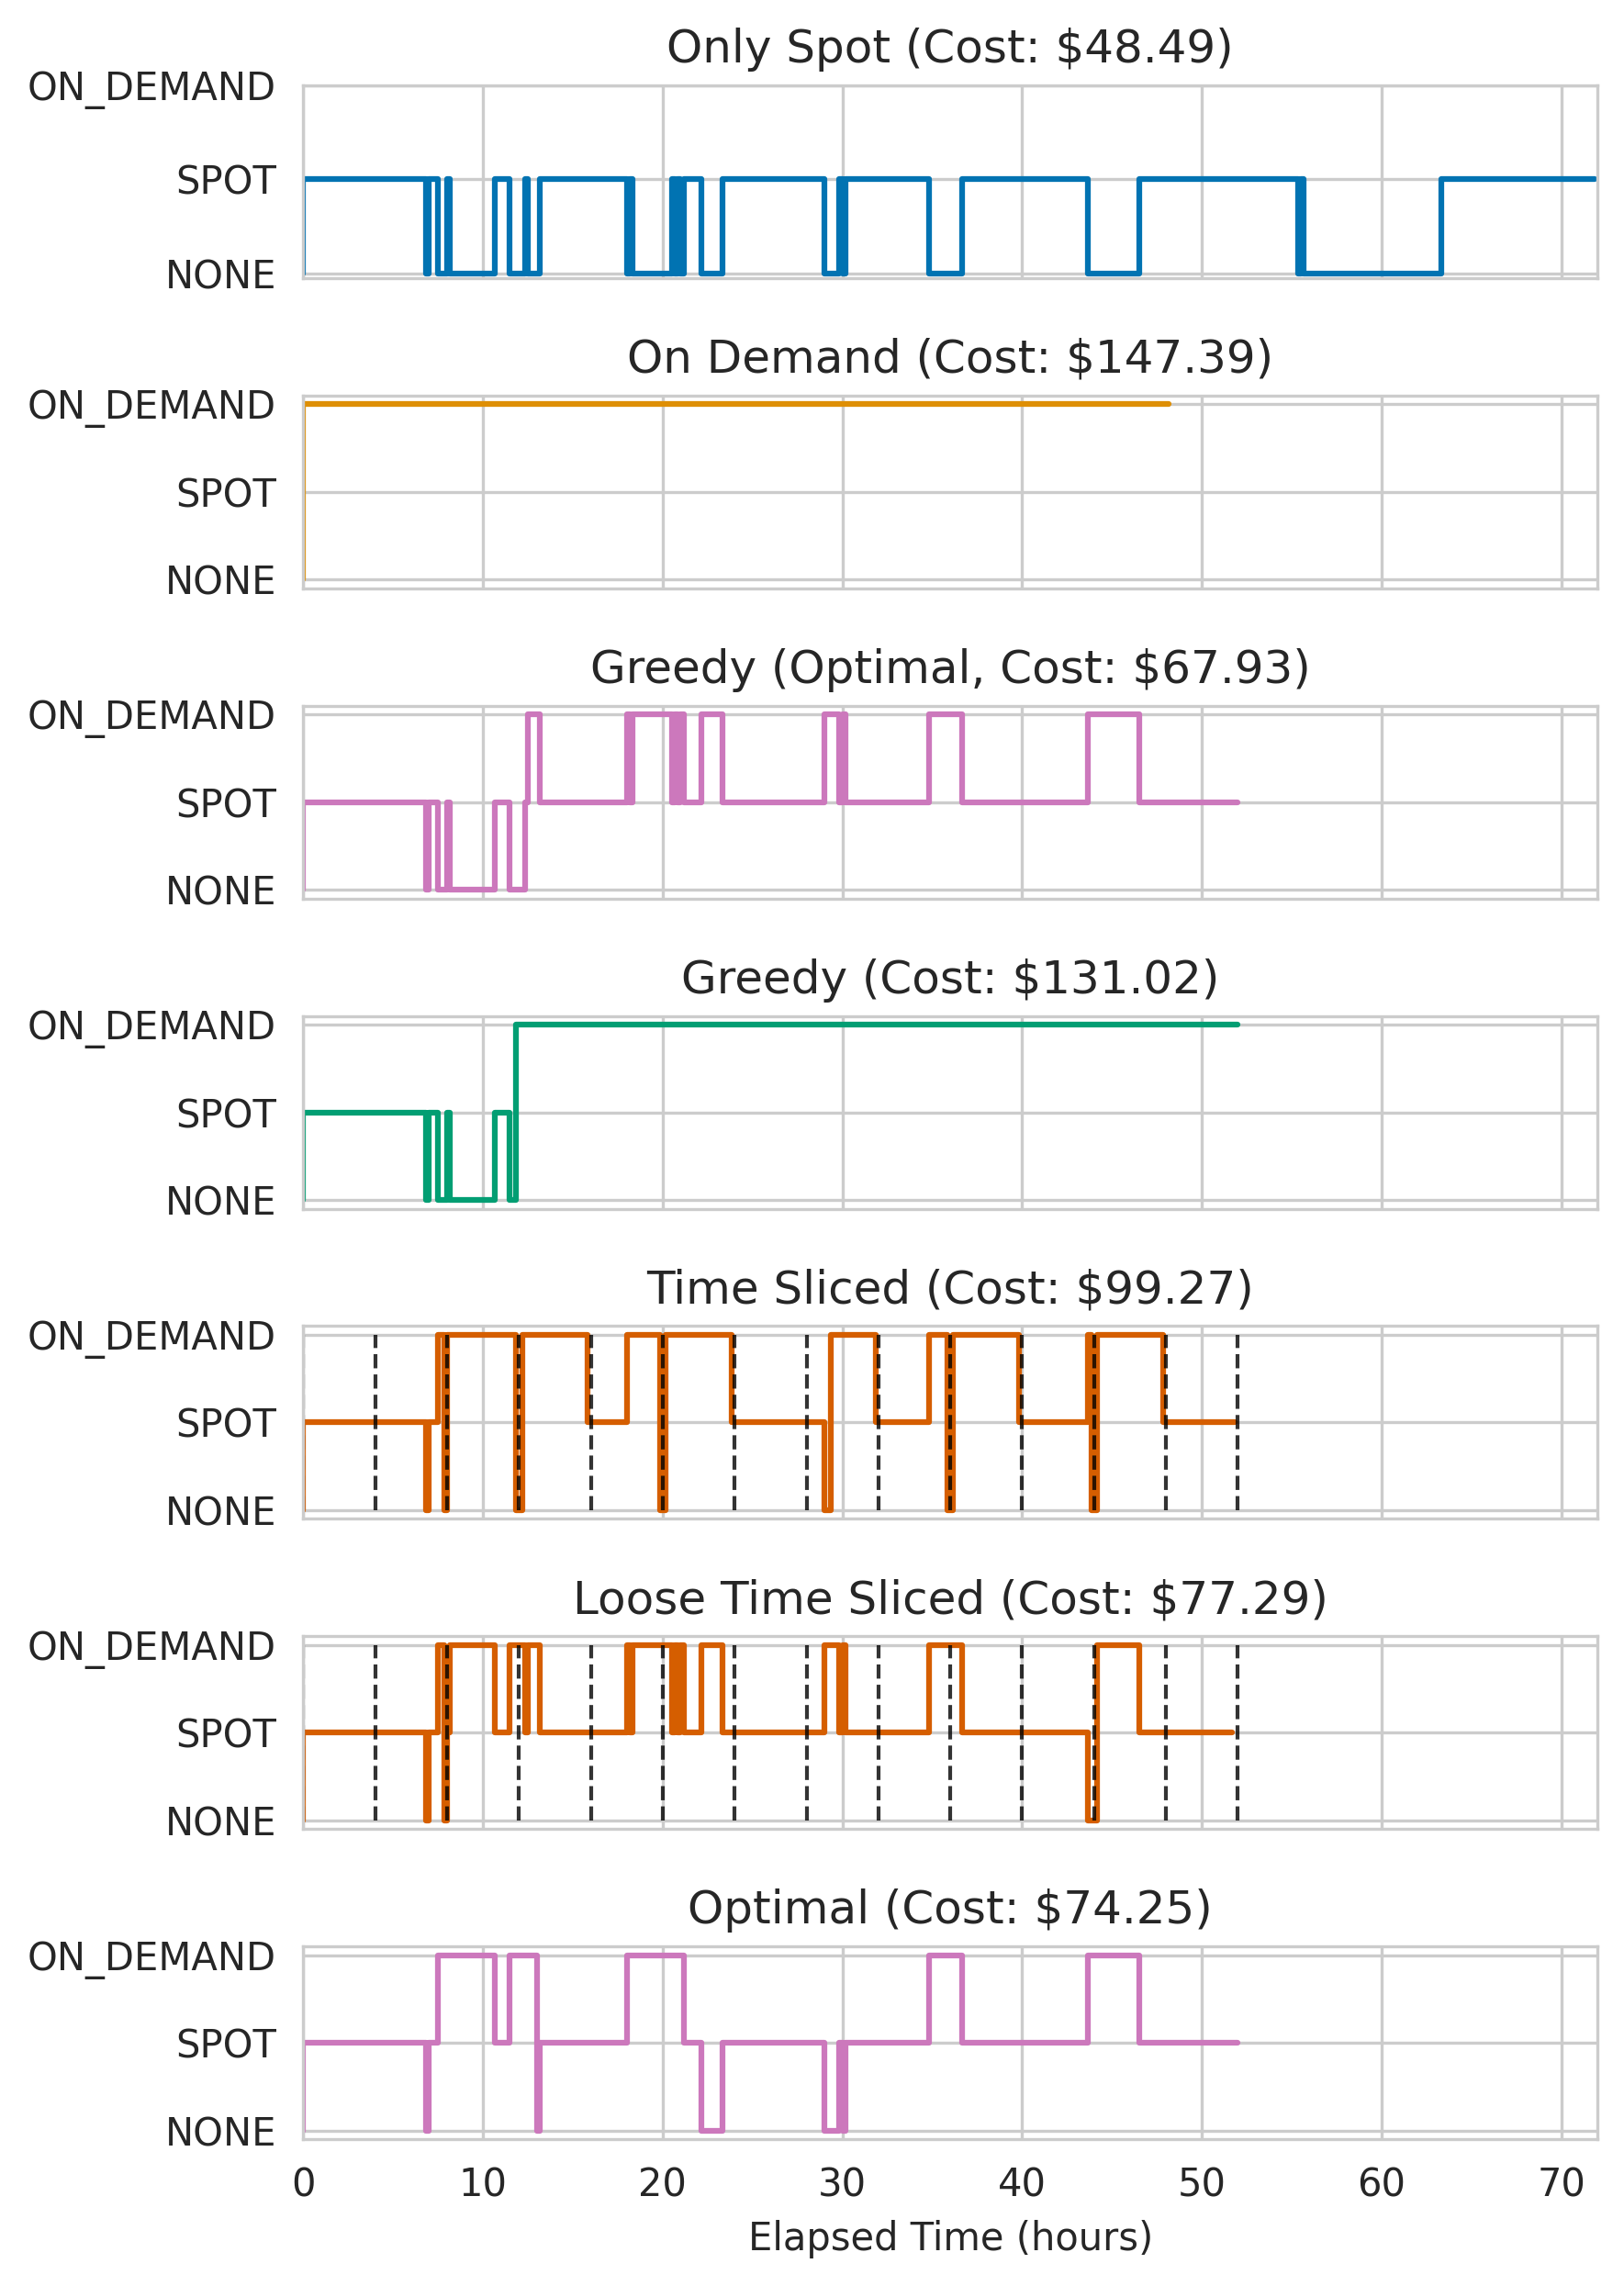

In [8]:

PLOT_ALGOS = ['Only Spot',
              'On Demand',
              'Optimal (no overhead)',
              'Greedy',
              'Time Sliced',
              'Loose Time Sliced',
              'Optimal',
            ]
fig = plt.figure(figsize=(6, 1.2 * len(PLOT_ALGOS)), dpi=300)
axes = fig.subplots(len(PLOT_ALGOS), sharex=True)
for i, algo in enumerate(PLOT_ALGOS):
    df = traces[algo]
    sns.lineplot(x=df['Elapsed'] / 3600, y=df['ClusterType']-1, drawstyle='steps-pre', ax=axes[i], color=colors[algo])
    if algo == 'Optimal (no overhead)':
        axes[i].set_title(f'Greedy (Optimal, Cost: ${df["Cost"].iloc[-1]:.2f})')
    else:
      axes[i].set_title(f'{algo} (Cost: ${df["Cost"].iloc[-1]:.2f})')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].set_xlim(0, 72)
    axes[i].set_yticks([0, 1, 2])
    axes[i].set_yticklabels(['NONE', 'SPOT', 'ON_DEMAND'])
    axes[i].legend().set_visible(False)
    if 'Time Sliced' in algo:
       axes[i].vlines(np.arange(0, 53, 4), 0, 2, color='black', alpha=0.8, linewidth=1, linestyles='--')

axes[-1].set_xlabel('Elapsed Time (hours)')

fig.tight_layout()